# napari: layers

In the previous chapter, we have loaded a sample image with three channels in the viewer. Each of the channels was turned into an *image layer*. Here we are going to see other types of layers that are useful to annotate and process images. First we open again our sample image:

In [2]:
import napari

viewer = napari.Viewer()

viewer.open_sample('napari', 'cells3d');

## Image layer

If we check now our layers, we see that they are called image layers:

In [33]:
viewer.layers

[<Image layer 'membrane' at 0x17cc25070>, <Image layer 'nuclei' at 0x17cc02d60>, <Labels layer 'Labels' at 0x29429b220>]

Whether we deal with simple 2D images, or multi-channel volumetric time-lapses, the layer containing the actual imaging data is always an *Image layer*. There are three other base layer types that we can use in napari and they correspond to the icons visible in the layer list panel.

## Labels layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_labels.svg" width=40>

The labels layer is where typically show or work on segmentation data, i.e. sets of regions labeled with a single number or label. We can add such a layer by clicking on the corresponding button. By default it will have the same size as the images already opened in the viewer and be filled with 0s. We can check that it is now present in our layer list:

In [18]:
viewer.layers

[<Image layer 'membrane' at 0x17cc25070>, <Image layer 'nuclei' at 0x17cc02d60>, <Labels layer 'Labels' at 0x29429b220>]

In [19]:
viewer.layers[2].data.shape

(60, 256, 256)

As you can see above, in the case where we deal with nD images, the labels are also defined as nD allowing you to define e.g. volumetric labelings.

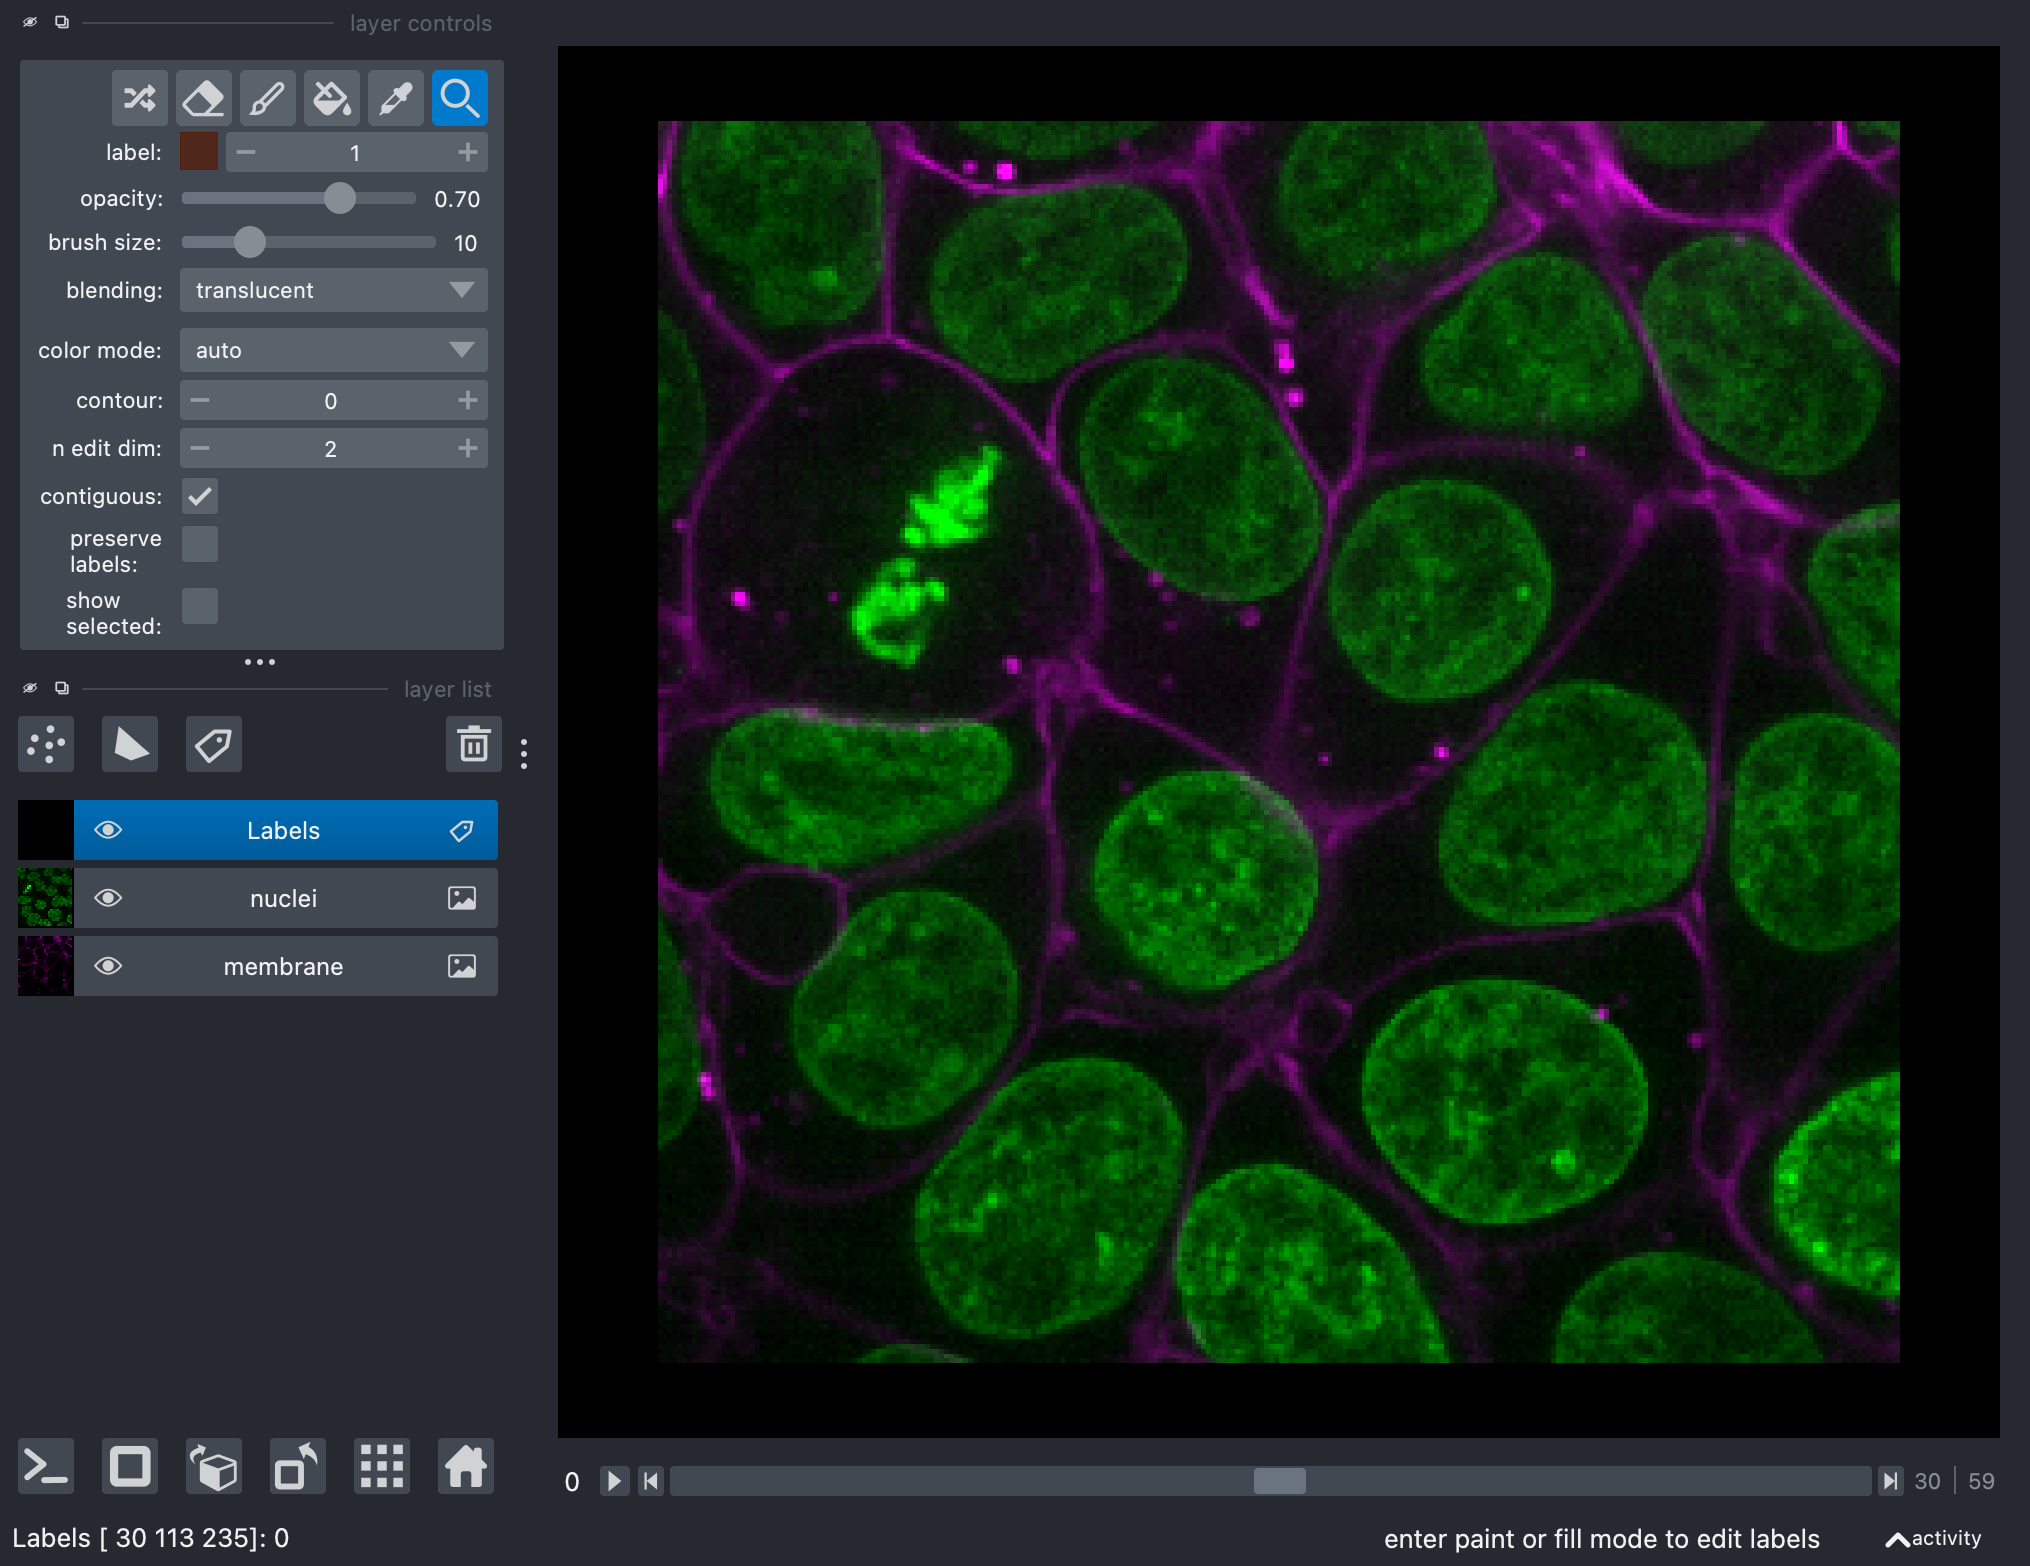

In [20]:
from napari.utils import nbscreenshot

nbscreenshot(viewer, alt_text='Labels layer')

We see that the layer controls have changed, offering now tools specific to the labels layer. For example we can select 
<img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/paint.svg" width=30> to manually draw labels on the image and use the ```label``` counter to switch the label value. We won't describe all options and tools here, so refer to the official documentation for more details:

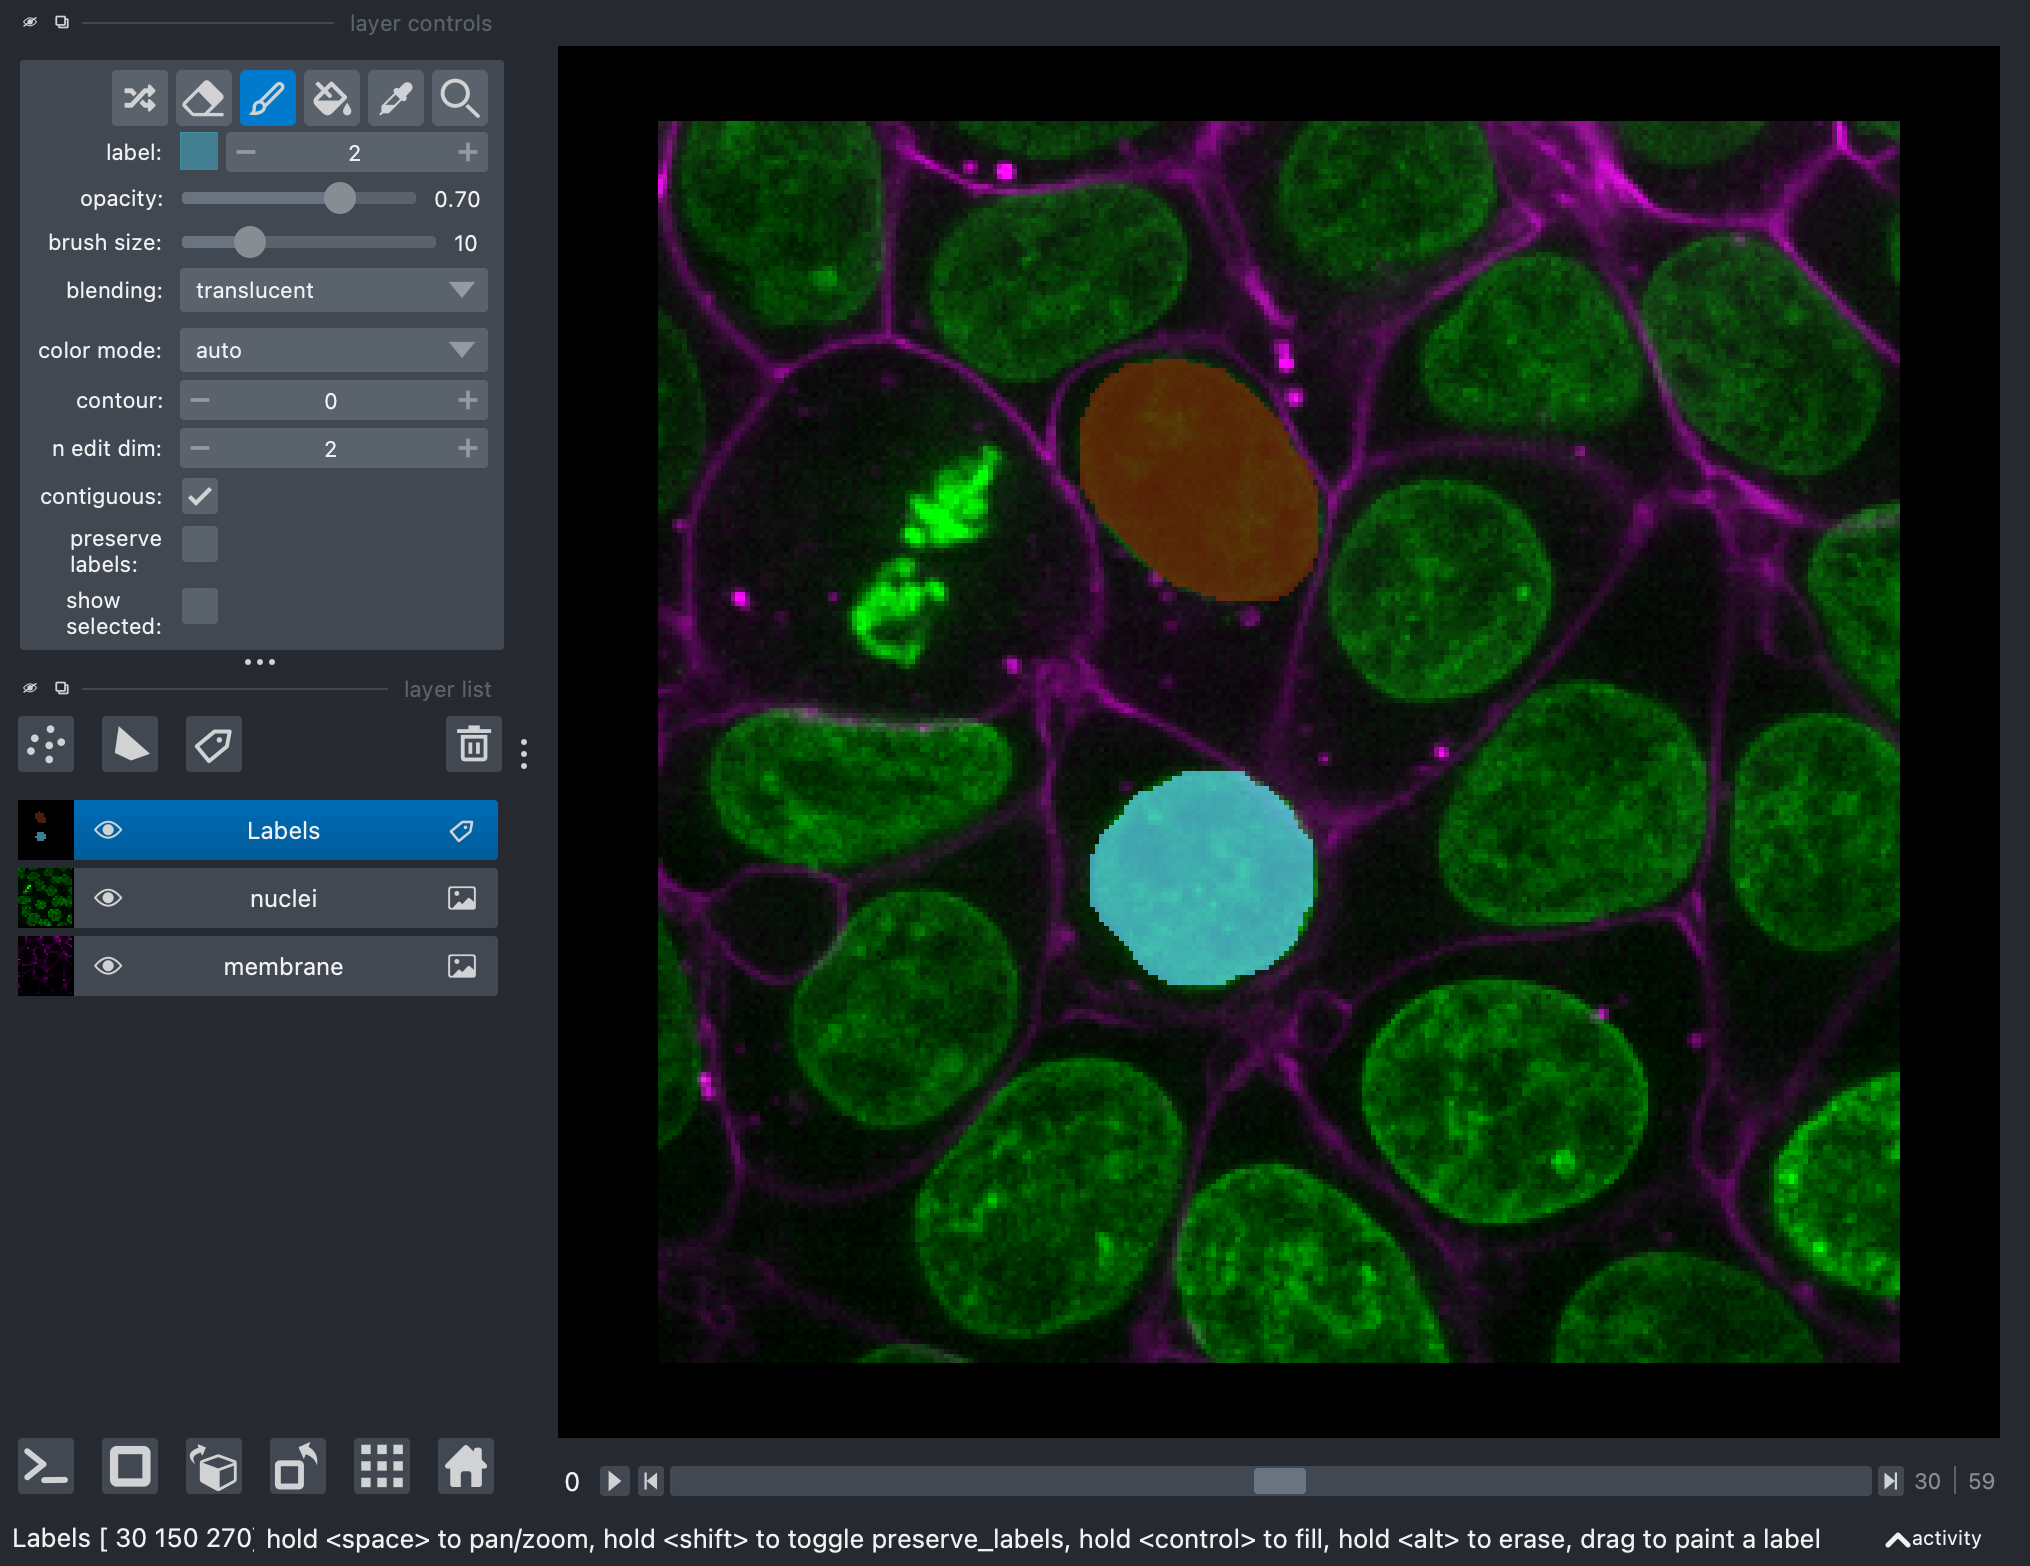

In [21]:
nbscreenshot(viewer, alt_text='Labels layer drawing')

### Modifying the labels programmatically

Instead of drawing, we can also act on the label layer from a notebook or script *programmatically*. For example we could threshold a specific plane and insert this in the label layer:

In [30]:
import skimage

current_image = viewer.layers['nuclei'].data[30]
im_th = current_image > skimage.filters.threshold_otsu(current_image)

viewer.layers['Labels'].data[30] = skimage.morphology.label(im_th)

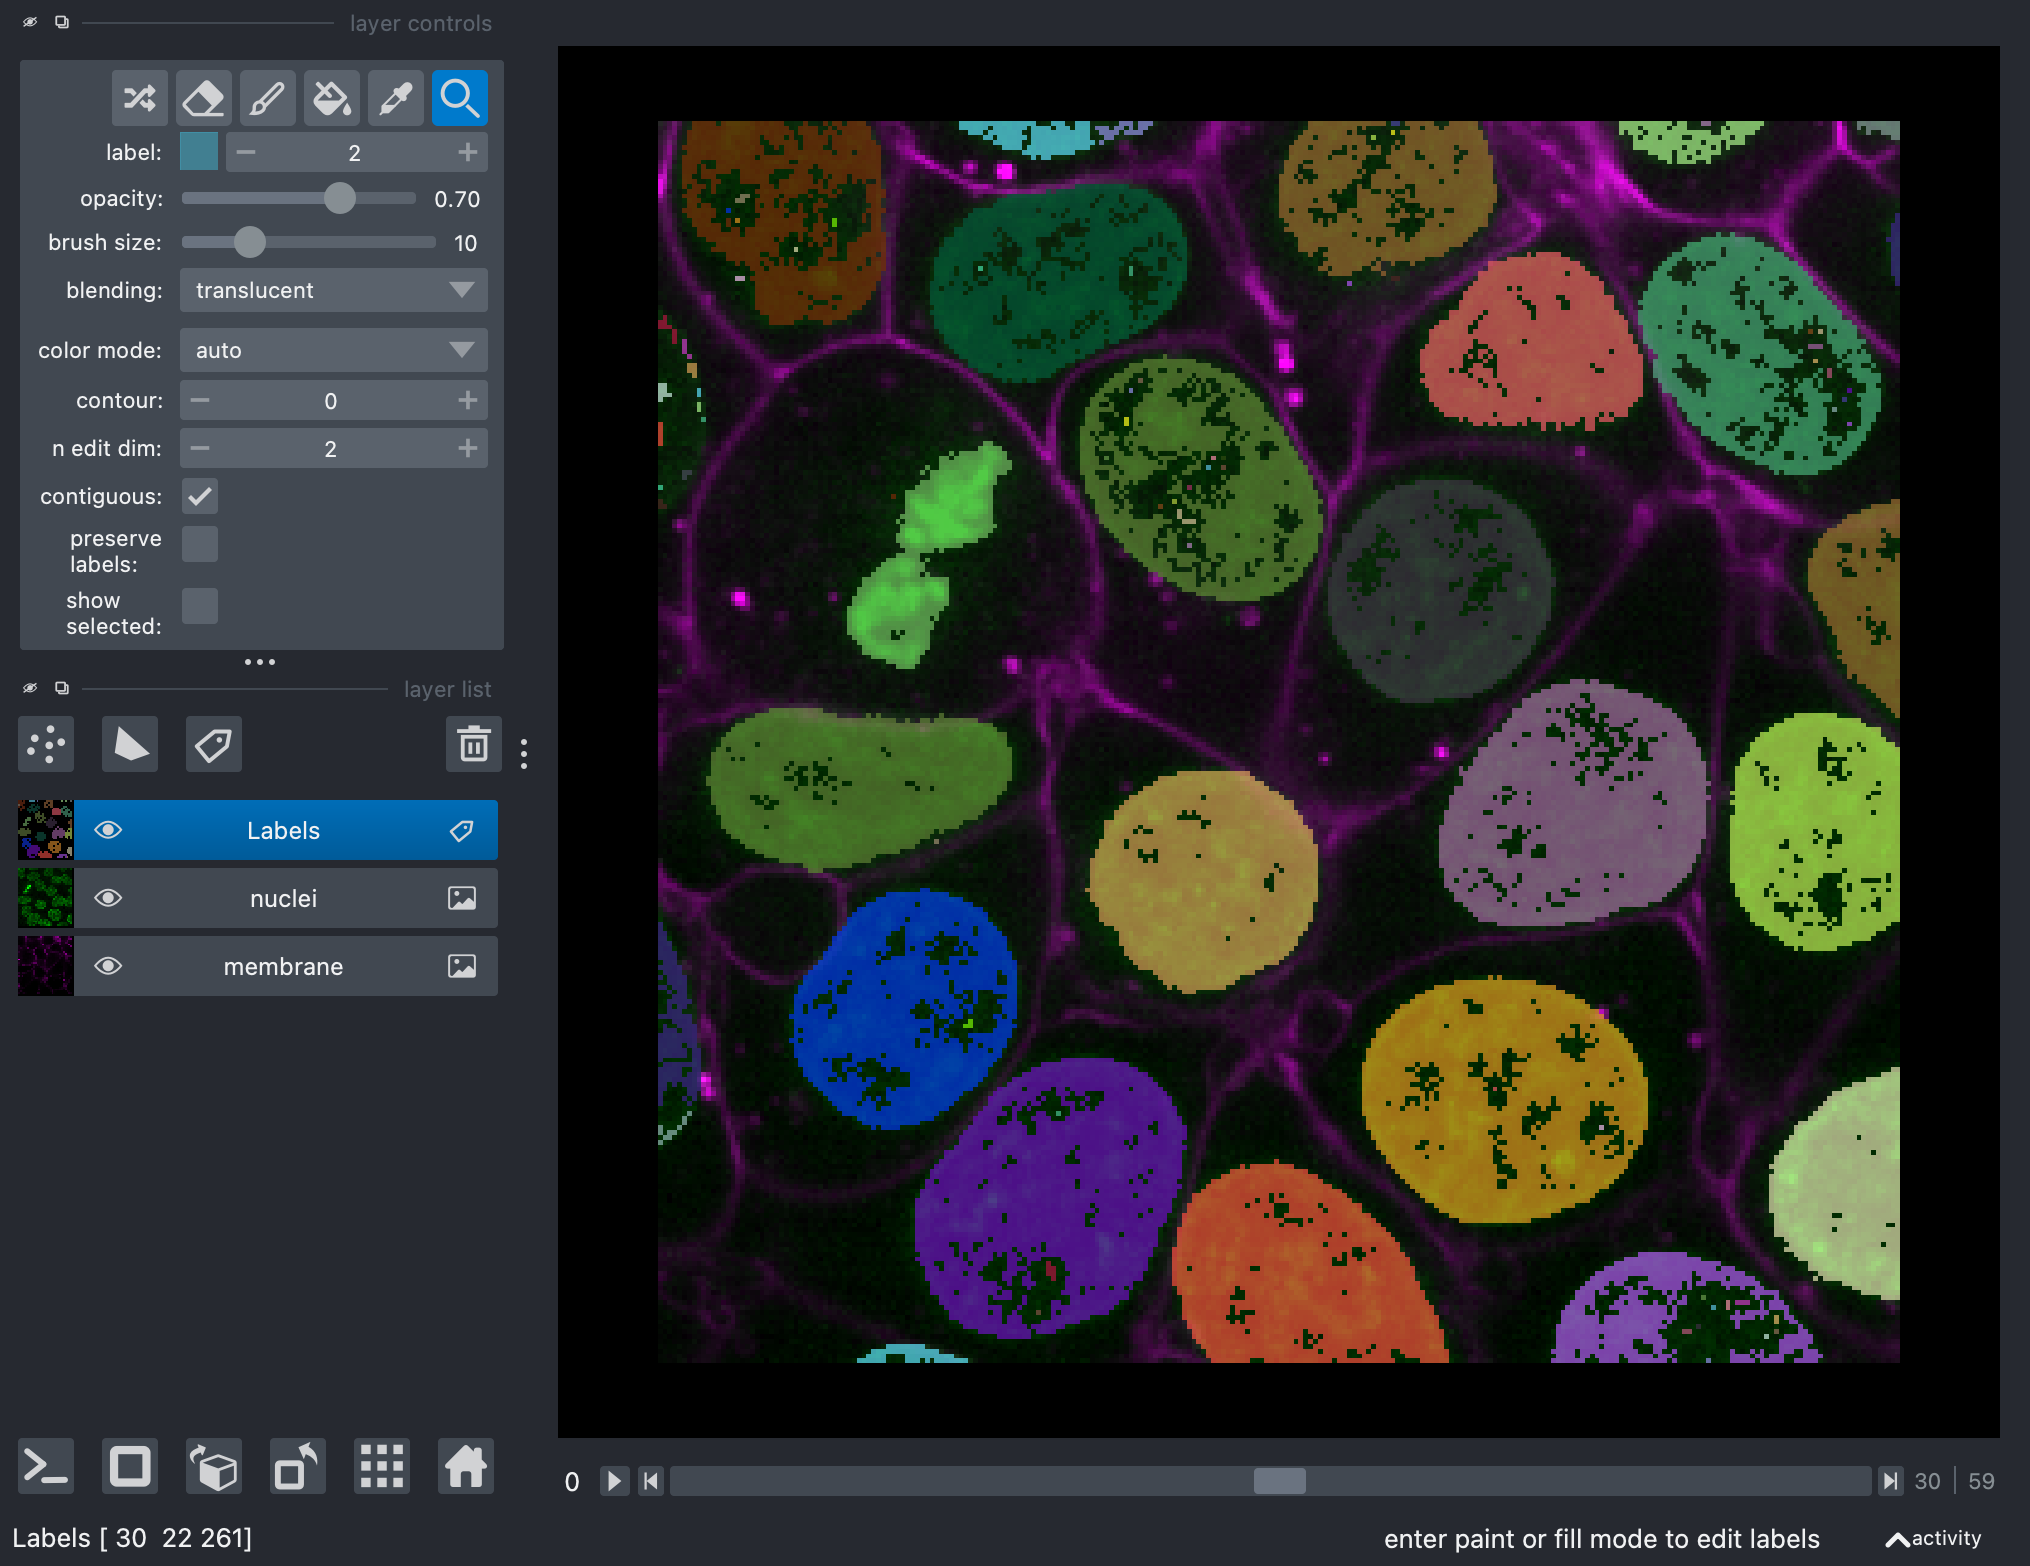

In [32]:
nbscreenshot(viewer, alt_text='Labels layer drawing')

## Shapes layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_shapes.svg" width=40>

The shapes layer roughly corresponds to drawing tools and ROIs that one finds in Fiji. Shapes can be open or closed polygons, each with a specific formatting (colors, thickness etc.). The comparison with ROIs is only limited as napari doesn't contain by default tools to do e.g. measurements in each ROI. There are however extensions to napari that can mimic this behavior. More on extensions (plugins) later on. The various icons appearing in the shapes layer controls are rather self-explanatory.

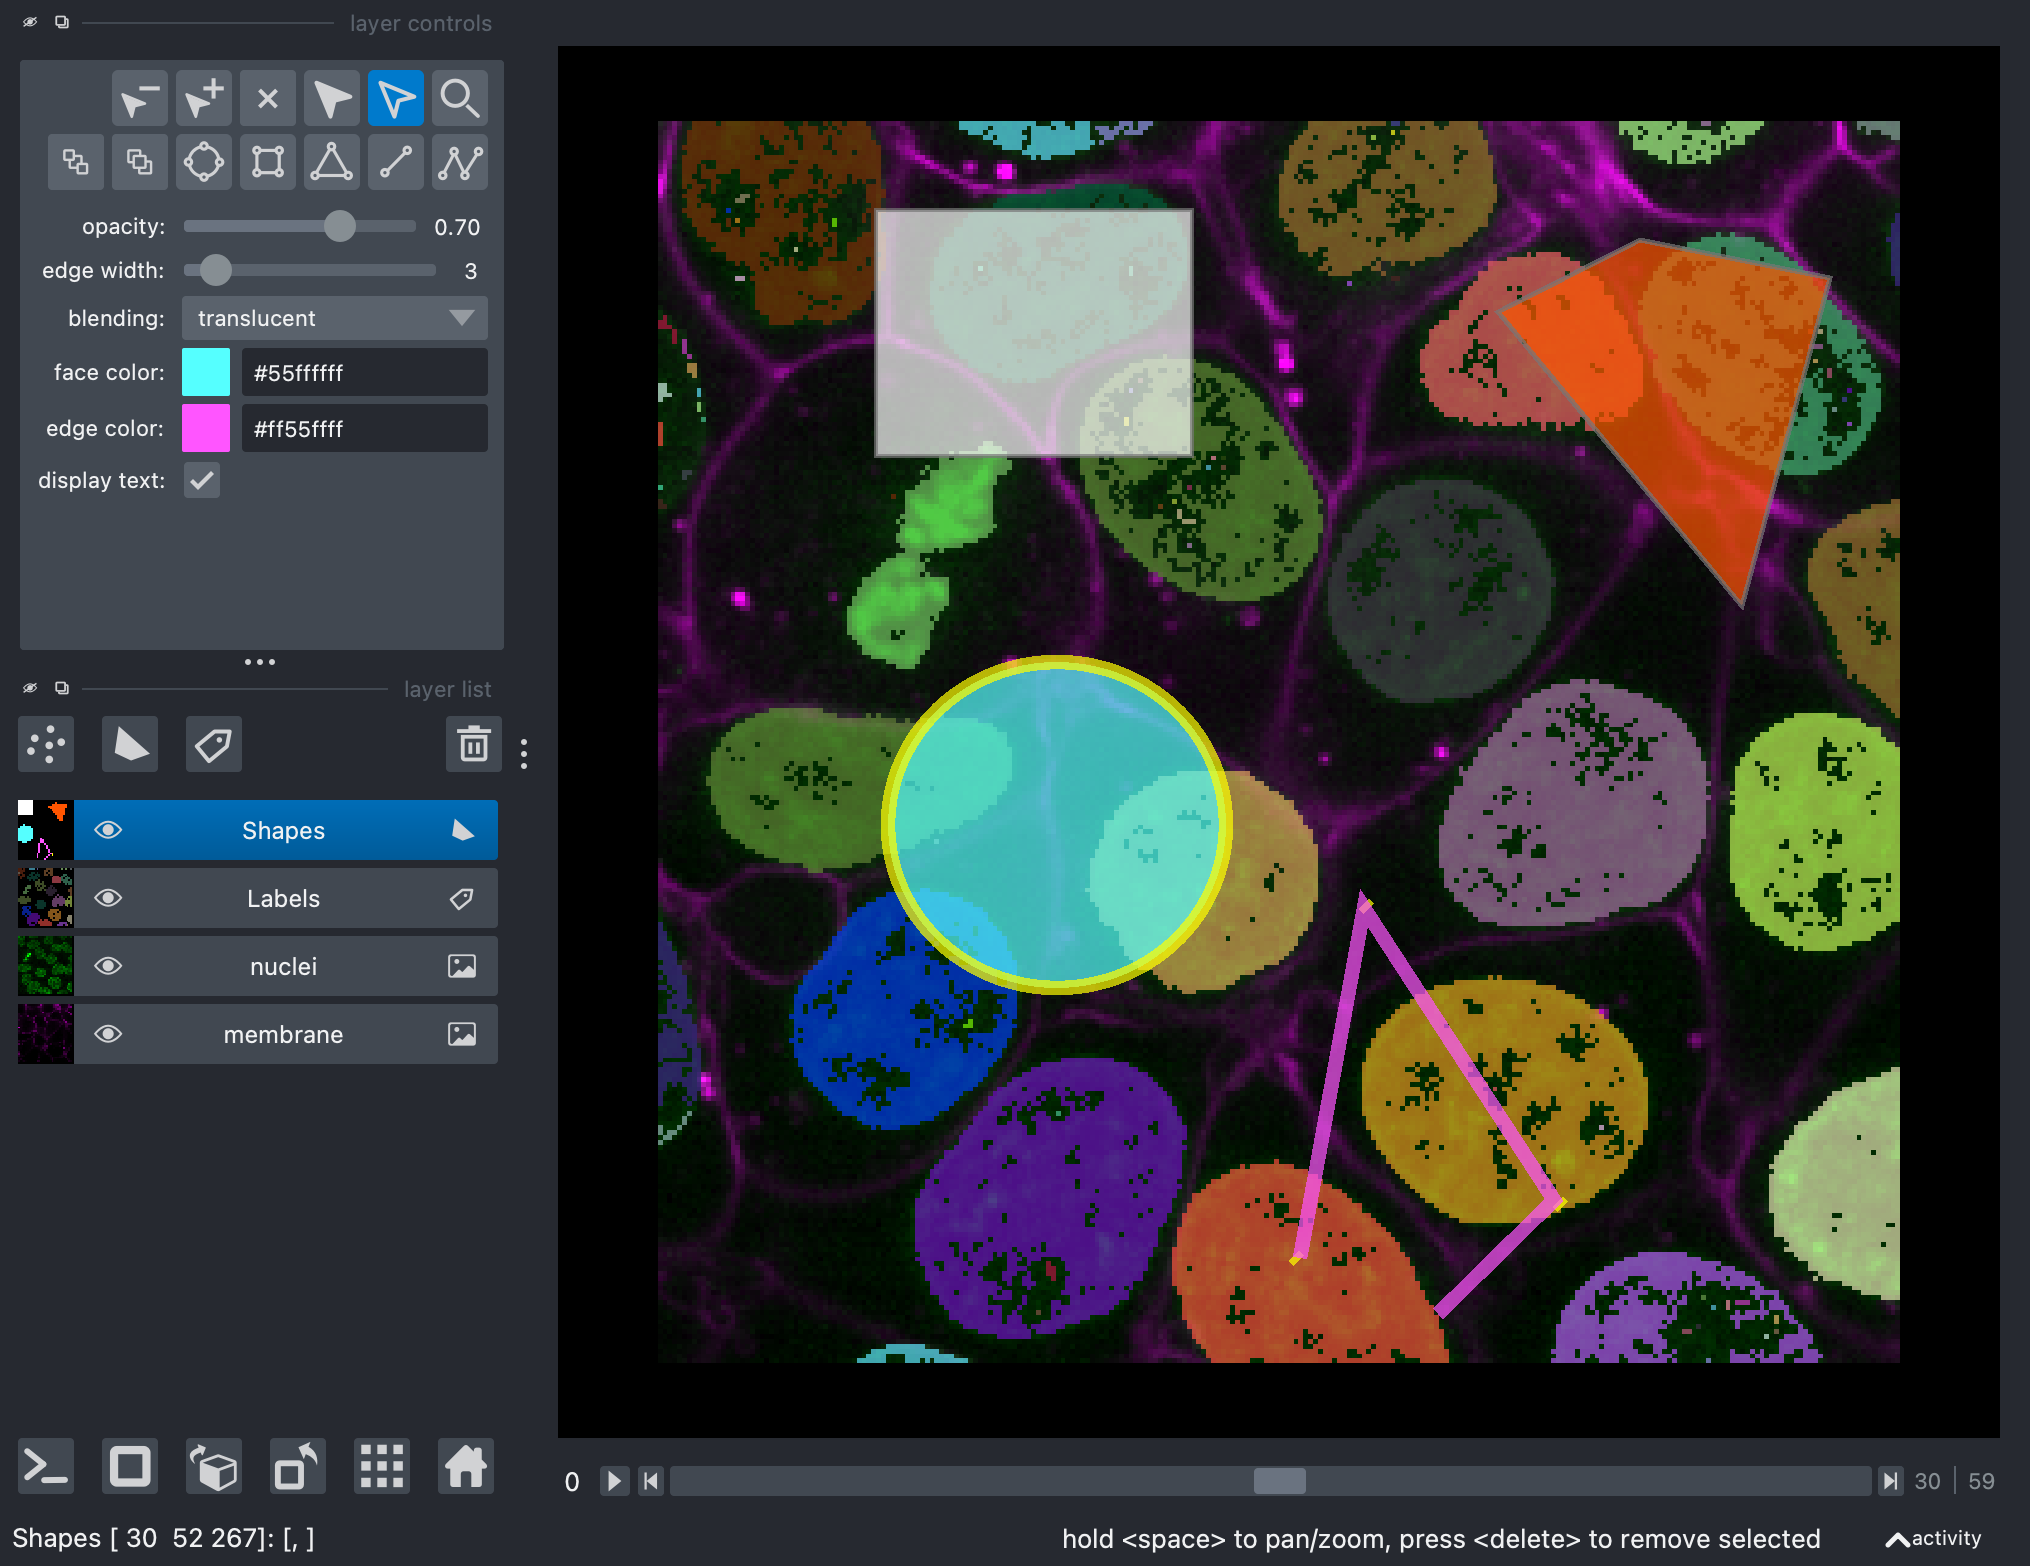

In [35]:
nbscreenshot(viewer, alt_text='Shapes layer drawing')

Here the data are not anymore arrays matching the image size like for the labels layer, but rather lists of coordinates of edges. Again, such coordinates can be added and modified programmatically.

In [37]:
viewer.layers['Shapes'].data

[array([[ 30.        ,  17.89755387,  44.47408747],
        [ 30.        ,  17.89755387, 109.5762938 ],
        [ 30.        ,  68.57838538, 109.5762938 ],
        [ 30.        ,  68.57838538,  44.47408747]]),
 array([[ 30.        ,  38.91155718, 172.61830373],
        [ 30.        ,  99.48133143, 222.88709596],
        [ 30.        ,  31.90688941, 241.01682431],
        [ 30.        ,  24.07814308, 201.87309265]]),
 array([[ 30.        , 111.01843128,  46.94632315],
        [ 30.        , 111.01843128, 116.58096157],
        [ 30.        , 178.18083402, 116.58096157],
        [ 30.        , 178.18083402,  46.94632315]]),
 array([[ 30.        , 233.39409762, 130.59029711],
        [ 30.        , 234.4241958 , 131.62039529]]),
 array([[ 30.        , 160.87518423, 145.01167193],
        [ 30.        , 161.90528241, 146.04177011]]),
 array([[ 30.        , 222.26903704, 184.97948215],
        [ 30.        , 223.29913522, 186.00958033]]),
 array([[ 30.        , 233.8061369 , 131.82641495],


As you can see, here again, the coordinates have three values, the first one corresponding here to the z-dimension. Hence polygons can also be defined as 3D objects. For example:

In [42]:
viewer.layers['Shapes'].data[0][0,0] = 10

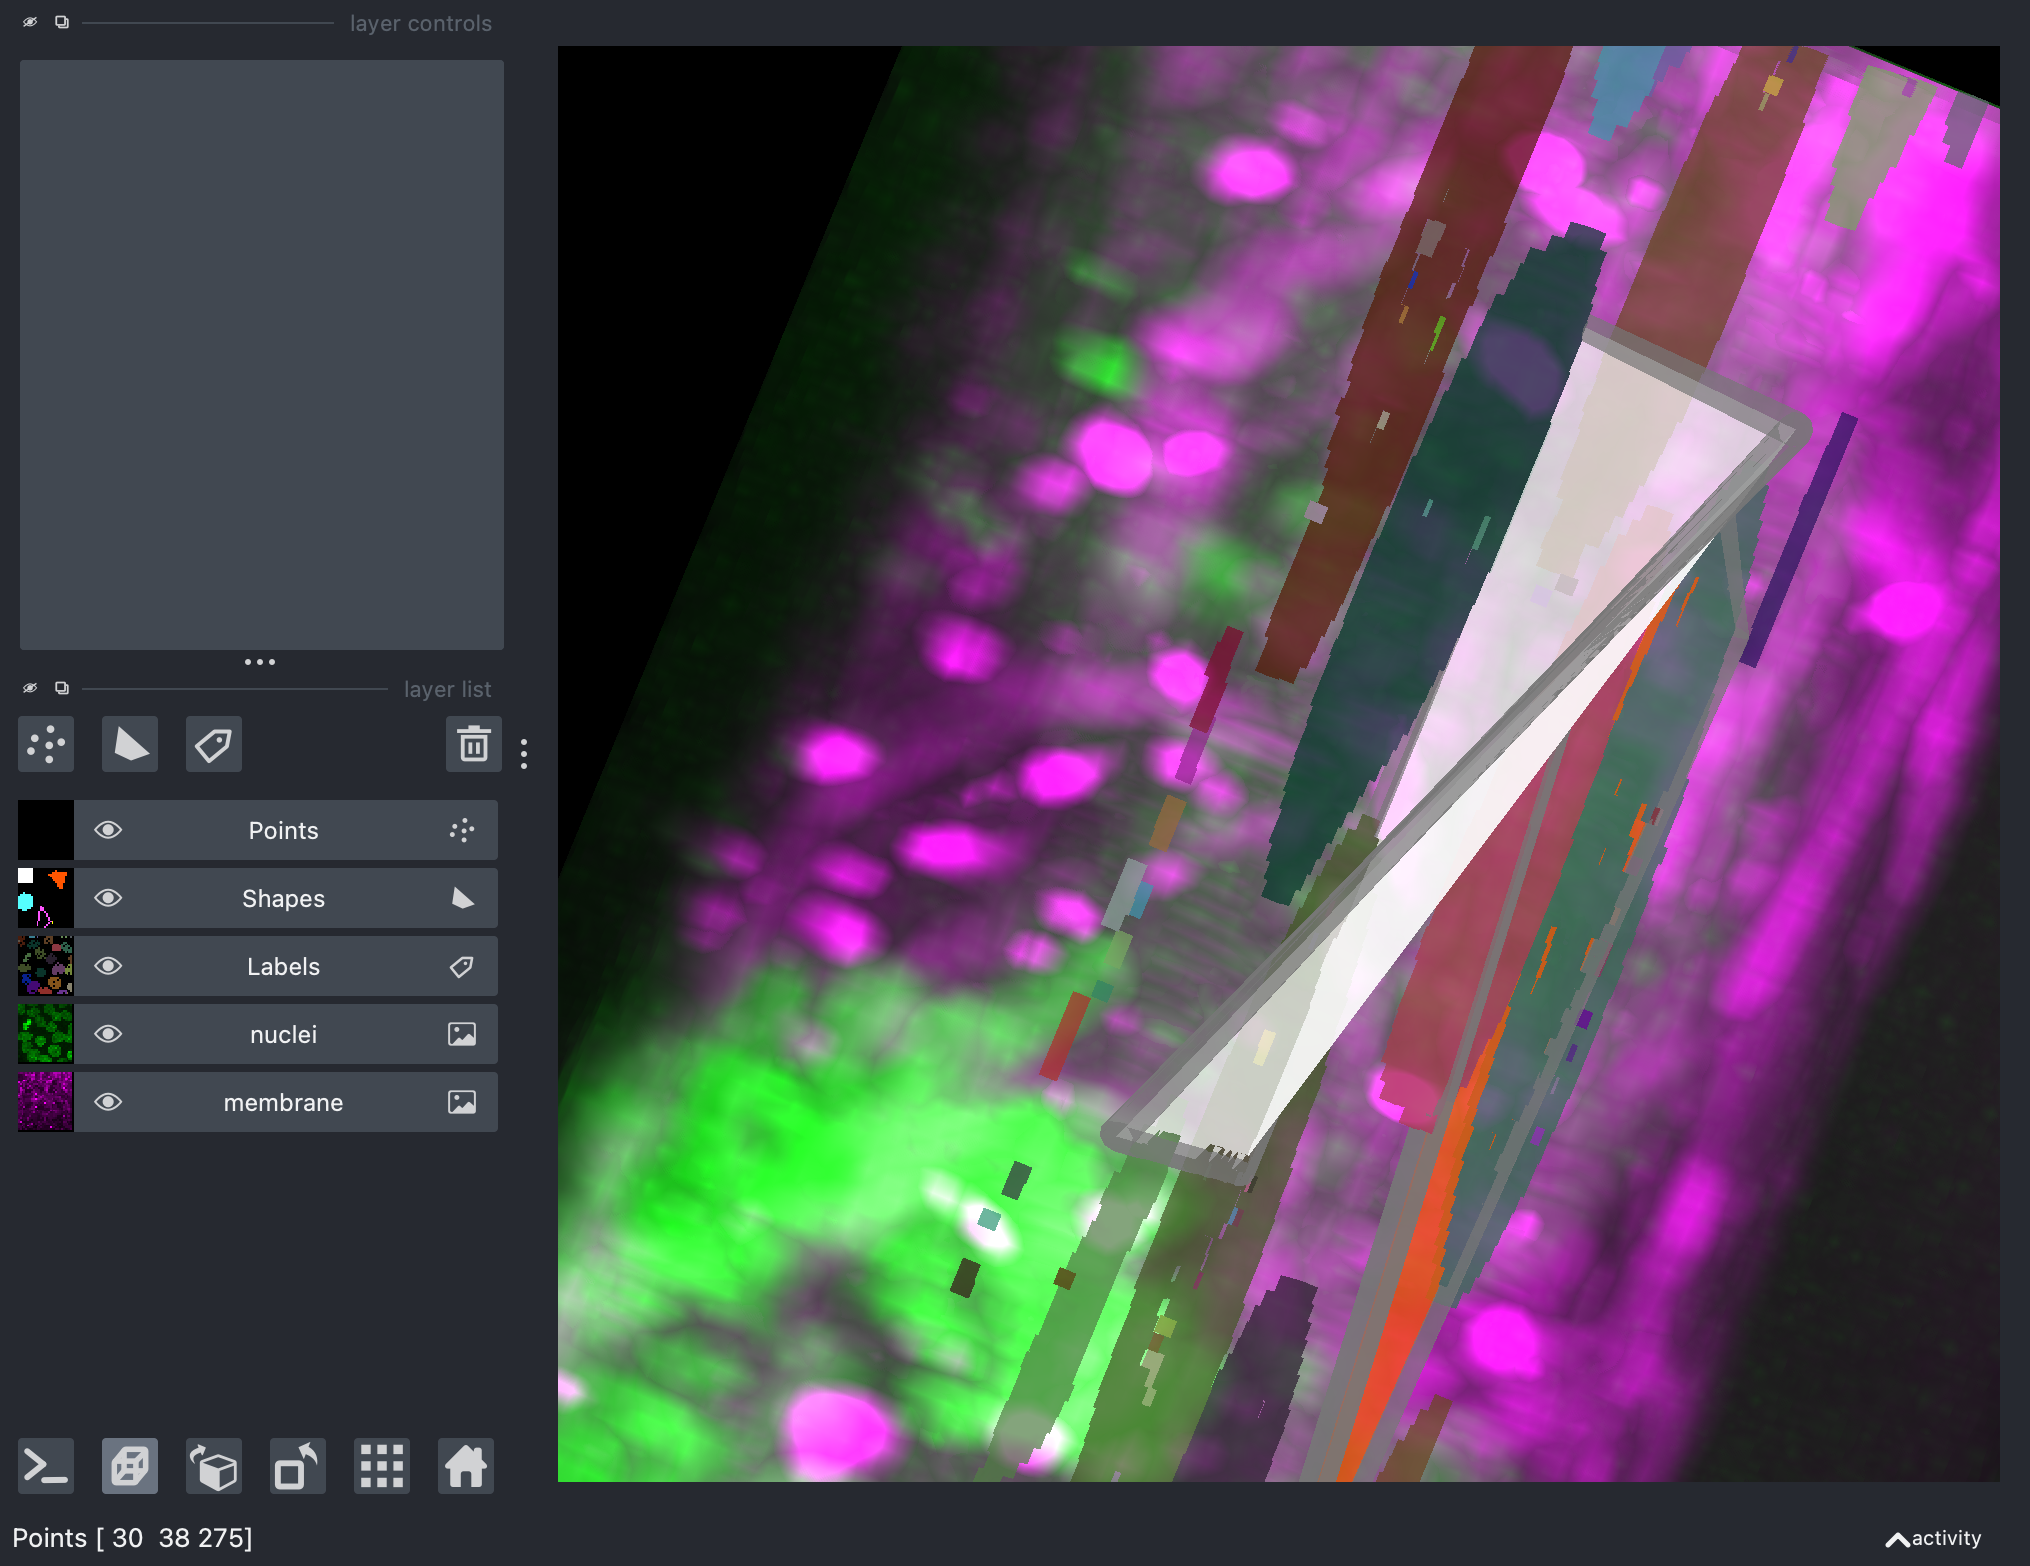

In [43]:
nbscreenshot(viewer, alt_text='Shapes layer drawing')

## Points layer <img src="https://raw.githubusercontent.com/napari/napari/1d84757bf528cd2bb885dc59ddfd15d88905276f/napari/resources/icons/new_points.svg" width=40>


The points layer allows to set a collection of points. This can for example be used to set specific points to use as reference for warping or alignment.

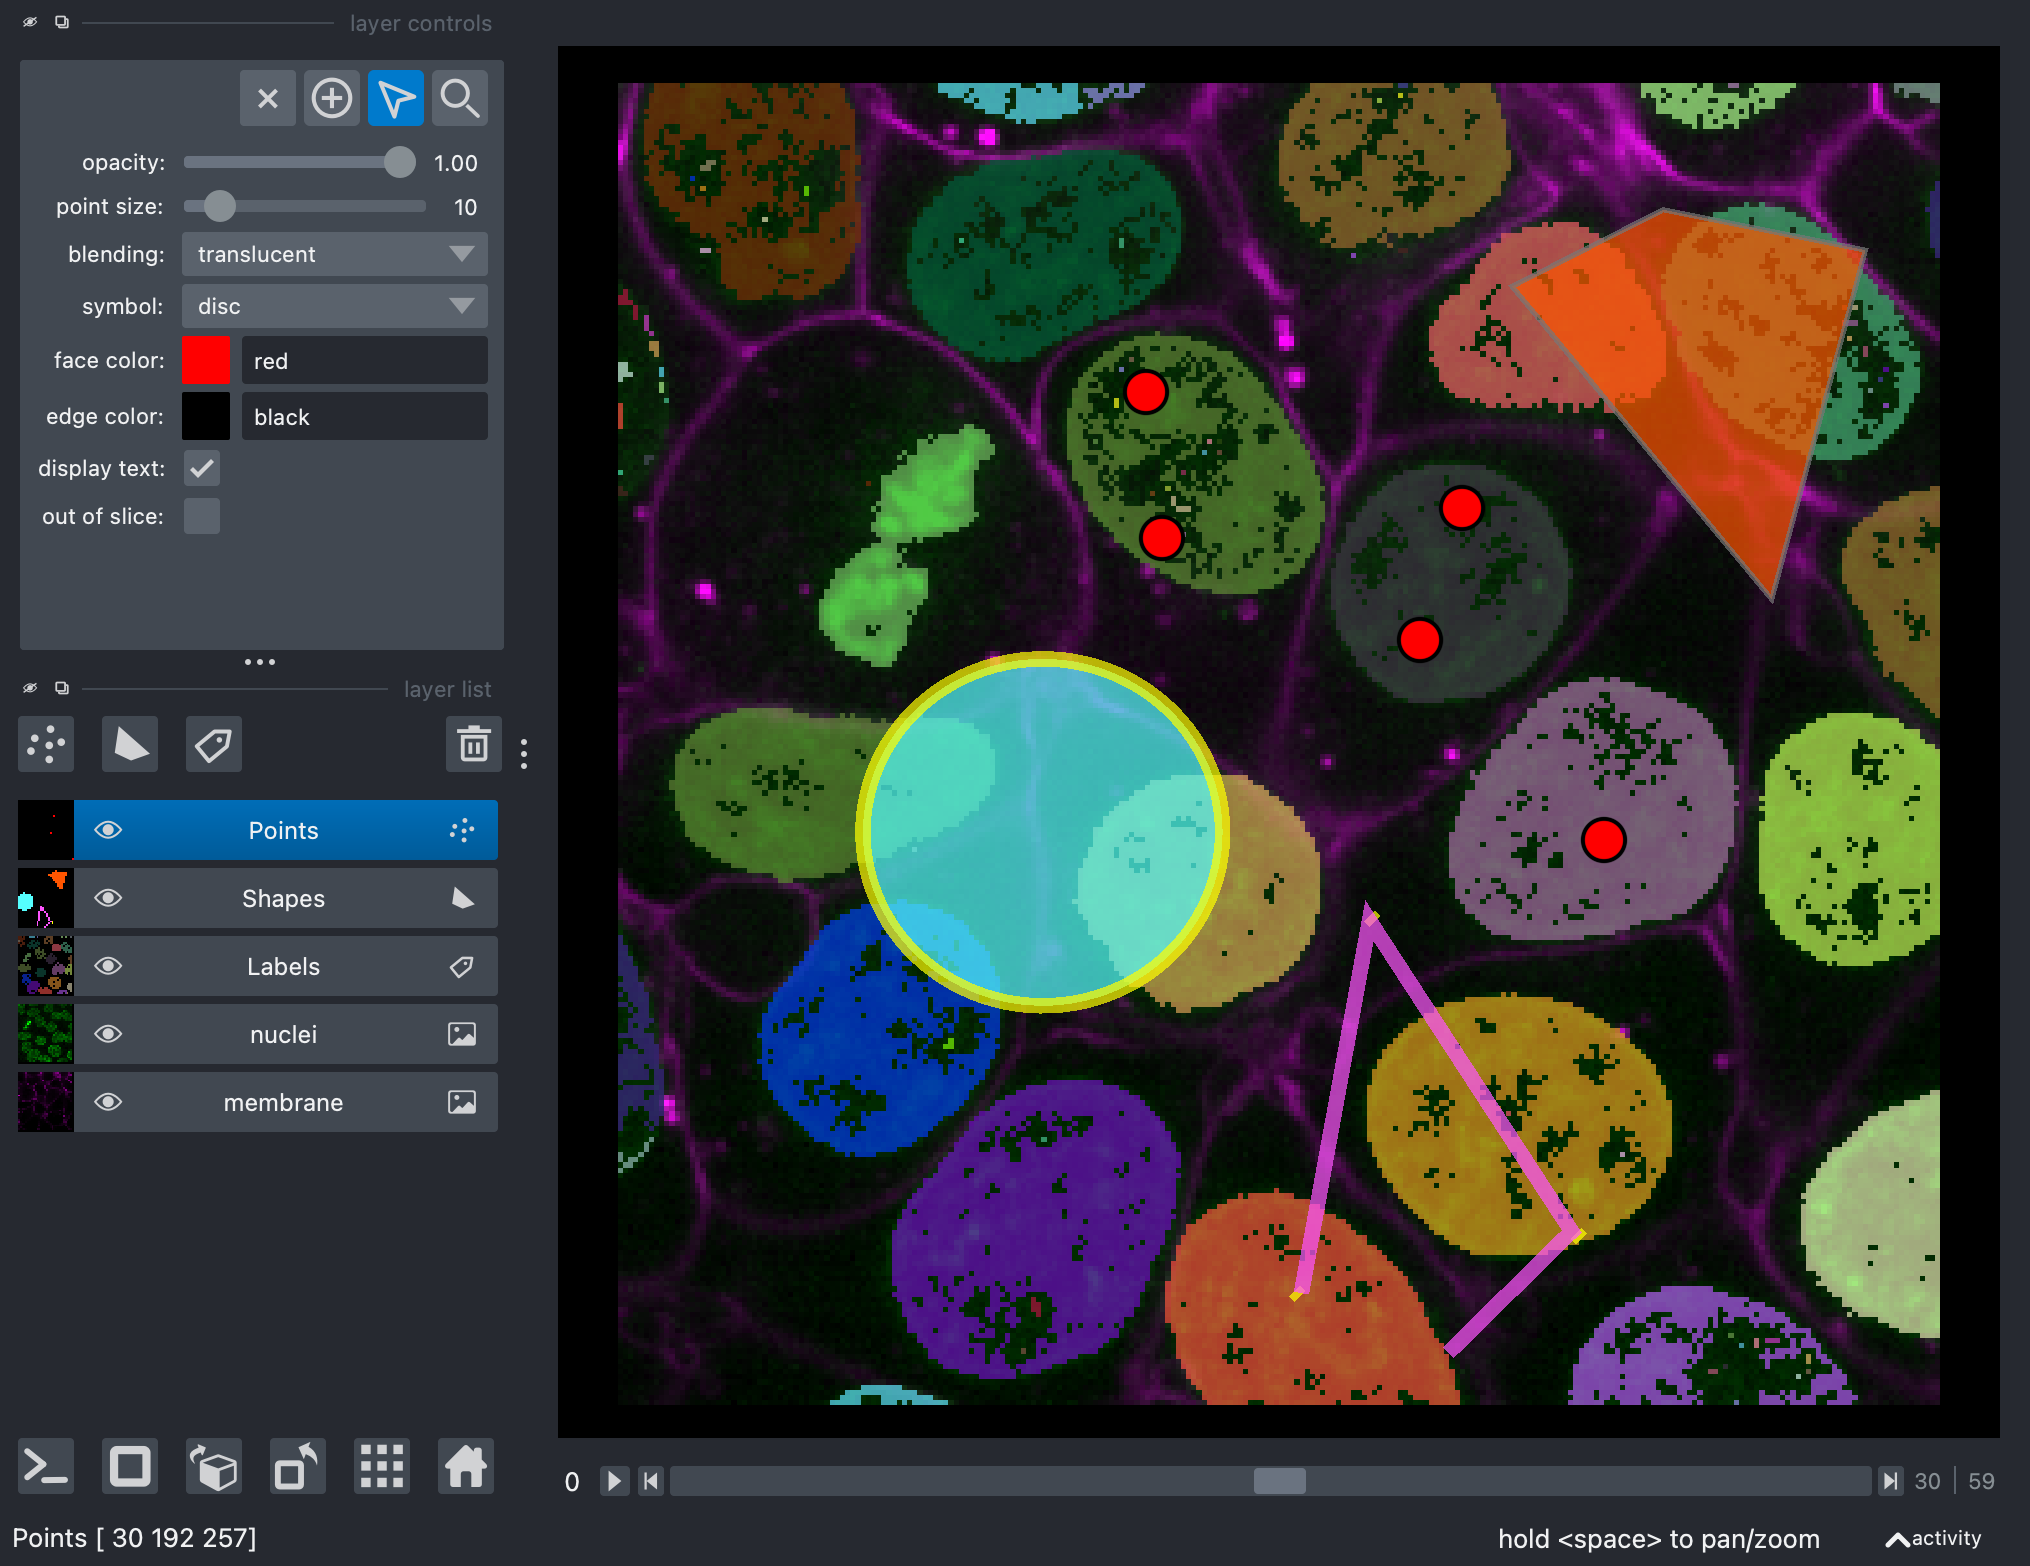

In [44]:
nbscreenshot(viewer, alt_text='Shapes layer drawing')

In [45]:
viewer.layers['Points'].data

array([[ 30.        ,  59.35722818, 101.75287168],
       [ 30.        ,  81.81336812, 162.92649427],
       [ 30.        , 107.36690667, 154.79582291],
       [ 30.        ,  87.62099052, 104.8502703 ],
       [ 30.        , 146.08438932, 190.41590695]])

Here, again, we are dealing with list of coordinates, this time a single list of 3D coordinates.

## Exercises

Open the Cells 3D image, try to add a layer of each type, add manual annotations, and then modify those programmatically.